# Chapter 9. Neural Network
##  CPE 490 590
### Author: Rahul Bhadani

# 1. Two-layer Neural Network on MNIST Dataset

### MNIST dataset is a dataset for handwritten digits

In [ ]:
!ls -lrt ../Data/MNIST

# Load the training Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set the font parameters
plt.rcParams['font.family'] = 'Serif'

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the dataset
df = pd.read_csv("https://github.com/rahulbhadani/CPE490_590_Sp2025/raw/refs/heads/master/Data/MNIST/mnist_train.csv.gz", header=None, compression='gzip')

# Visualize a few samples
def visualize_sample(index):
    first_row = df.iloc[index, 1:]
    image = np.reshape(first_row.values, (28, 28))
    plt.imshow(image, cmap='gray')
    plt.show()

visualize_sample(0)
visualize_sample(1)
visualize_sample(2)

# Separate features and labels
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Convert labels to one-hot encoding
y = np.eye(10)[y] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors and move to the GPU
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 3)
        self.fc2 = nn.Linear(3, 4)
        self.fc3 = nn.Linear(4, 5)
        self.fc4 = nn.Linear(5, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.softmax(self.fc4(x))
        return x

model = SimpleNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train the model
epochs = 100
for epoch in range(epochs):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')


Here, the first column with index 0 is label (digit 5 for first row, digit 0 for the second row, and so on)

## Load the test data

In [ ]:

df_test = pd.read_csv('https://raw.githubusercontent.com/rahulbhadani/CPE490_590_Sp2025/refs/heads/master/Data/MNIST/mnist_test.csv', header=None)
X_unknown = df_test.iloc[:, 1:].values
y_known = df_test.iloc[:, 0].values

# Convert to PyTorch tensors and move to the GPU
X_unknown = torch.tensor(X_unknown, dtype=torch.float32).to(device)

# Predict the labels of the unknown data
with torch.no_grad():
    y_pred = model(X_unknown)
    y_pred_labels = torch.argmax(y_pred, dim=1).cpu().numpy()

# Compute accuracy
accuracy = accuracy_score(y_known, y_pred_labels)
print("Accuracy: ", accuracy)

# Find the indices of the accurately predicted samples
accurate_indices = np.where(y_pred_labels == y_known)[0]
print("Accurate indices: ", accurate_indices)

# Verify a sample
sample_index = 5
print(f"Actual label: {y_known[sample_index]}")
print(f"Predicted label: {y_pred_labels[sample_index]}")
first_row = df_test.iloc[sample_index, 1:]
image = np.reshape(first_row.values, (28, 28))
plt.imshow(image, cmap='gray')
plt.show()

# 2. Neural Network on Iris Dataset

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# load dataset
Iris = pd.read_csv("https://raw.githubusercontent.com/rahulbhadani/CPE490_590_Sp2025/refs/heads/master/Data/Iris/iris.data")
Iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Extract Features and Class

In [2]:
X = Iris[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
Labels = Iris[["Class"]]

## Split into Training and Test Dataset

In [3]:
# Split the dataset into training and test sets
X_train, X_test, y_train_label, y_test_label = train_test_split(X, Labels, test_size=0.3, random_state=42)

## Scale the Feature

In [4]:
# Standardize the features to have mean=0 and variance=1
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

## Convert class vectors to binary class matrices (for use in categorical_crossentropy)

In [5]:
# Reshape y_train and y_test to be 1D arrays
y_train_label = np.ravel(y_train_label)
y_test_label = np.ravel(y_test_label)

# Now you can fit and transform without warnings
encoder = LabelEncoder()
encoder.fit(y_train_label)
y_train = encoder.transform(y_train_label)
y_test = encoder.transform(y_test_label)

In [6]:
# Convert to PyTorch tensors and move to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


# Convert to tensors
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_test = torch.LongTensor(y_test).to(device)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

Using device: cuda


## Define a Neural Network

In this code, kaiming_normal_ applies a normal initializer, which initializes the weights of the layer with values drawn from a normal distribution centered on 0, with stddev = sqrt(2 / fan_in), where fan_in is the number of input units in the weight tensor.

In [7]:
# Initialize empty sequential model
model = nn.Sequential()

# Add layers sequentially
model.add_module('input_layer', nn.Linear(4, 5))
model.add_module('act1', nn.ReLU())
model.add_module('hidden_layer1', nn.Linear(5, 4))
model.add_module('act2', nn.ReLU())
model.add_module('output_layer', nn.Linear(4, 3))
#model.add_module('softmax_layer', nn.Softmax(dim=1))

nn.init.kaiming_normal_(model.input_layer.weight, mode='fan_in', nonlinearity='relu')

model = model.to(device)

print(model)

Sequential(
  (input_layer): Linear(in_features=4, out_features=5, bias=True)
  (act1): ReLU()
  (hidden_layer1): Linear(in_features=5, out_features=4, bias=True)
  (act2): ReLU()
  (output_layer): Linear(in_features=4, out_features=3, bias=True)
)


## Let's see the initial Weights

In [8]:
model.input_layer.weight

Parameter containing:
tensor([[ 0.0489, -0.2687, -1.0276,  0.2970],
        [ 0.5881, -0.7855, -0.2434, -0.7293],
        [ 0.2629, -0.7528, -0.6139,  0.3739],
        [-0.4663, -0.5081, -0.4973,  0.7946],
        [ 0.5746,  0.2292, -0.2962, -0.1558]], device='cuda:0',
       requires_grad=True)

In [9]:
model.output_layer.weight

Parameter containing:
tensor([[ 0.4371, -0.2841,  0.0933, -0.2725],
        [ 0.2839,  0.4736,  0.2685,  0.2328],
        [ 0.4045, -0.2307,  0.2065, -0.3110]], device='cuda:0',
       requires_grad=True)

In [10]:
# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)


Training accuracy: 0.980952
Test accuracy: 1.000000


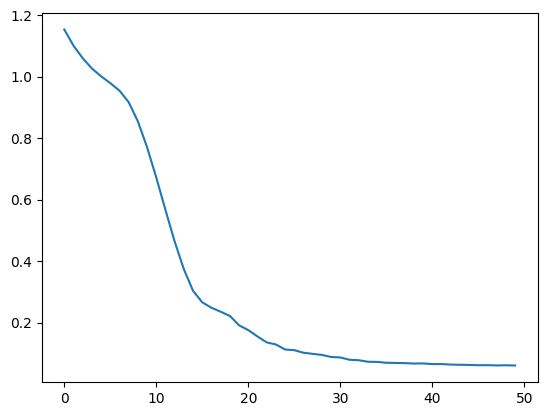

In [11]:
# Training loop
epochs = 50
loss_vec = []
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss_vec.append(loss.detach().item())
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(loss_vec)

#training loss
with torch.no_grad():
    train_outputs = model(X_train)
    _, predicted = torch.max(train_outputs, 1)
    accuracy = (predicted == y_train).sum().item() / y_train.size(0)
    print(f'Training accuracy: {accuracy:.6f}')
    
# Evaluation
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test accuracy: {accuracy:.6f}')

## saving the model

In [12]:
model.eval()
dummy_input = X_train[0].unsqueeze(0)  # Adds batch dimension

# Export the model to ONNX format
torch.onnx.export(
    model,                  # Model to export
    dummy_input,            # Example model input
    "iris_model.onnx",           # Output file name
    export_params=True,     # Store trained parameters
    opset_version=11,       # ONNX opset version
    do_constant_folding=True,  # Optimize constants
    input_names=['input'],  # Input tensor name
    output_names=['output'], # Output tensor name
    dynamic_axes={          # Allow dynamic batch size
        'input': {0: 'batch_size'},
        'output': {0: 'batch_size'}
    }
)


## inference with ONNX model

In [19]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
import onnxruntime as ort
import numpy as np
import pandas as pd


# Load your new data (example)
new_data = pd.DataFrame({
    'SepalLength': [5.1, 6.3],
    'SepalWidth': [3.5, 2.8],
    'PetalLength': [1.4, 5.1],
    'PetalWidth': [0.2, 1.8]
})

ort_session = ort.InferenceSession("iris_model.onnx")

# Run inference
logits = ort_session.run(None, {'input': new_data.values.astype(np.float32)})[0]
pred_indices = np.argmax(logits, axis=1)
encoder.inverse_transform(pred_indices)

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

In [41]:
## inspecting the saved-and-then-loaded model
# Get model metadata
input_details = ort_session.get_inputs()
output_details = ort_session.get_outputs()
print("Input details:")
print(f"Name: {input_details[0].name}")
print(f"Shape: {input_details[0].shape}")
print(f"Type: {input_details[0].type}")

print("\nOutput details:")
print(f"Name: {output_details[0].name}")
print(f"Shape: {output_details[0].shape}")
print(f"Type: {output_details[0].type}")

Input details:
Name: input
Shape: ['batch_size', 4]
Type: tensor(float)

Output details:
Name: output
Shape: ['batch_size', 3]
Type: tensor(float)


In [27]:
new_data['Class'] = encoder.inverse_transform(pred_indices)
new_data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-versicolor
1,6.3,2.8,5.1,1.8,Iris-virginica


/tmp/ipykernel_87474/3895989391.py:9: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=new_data, x="SepalLength", y="SepalWidth", hue="Class", s=400, style="Class", markers=["^", "s", "o"], legend='full')


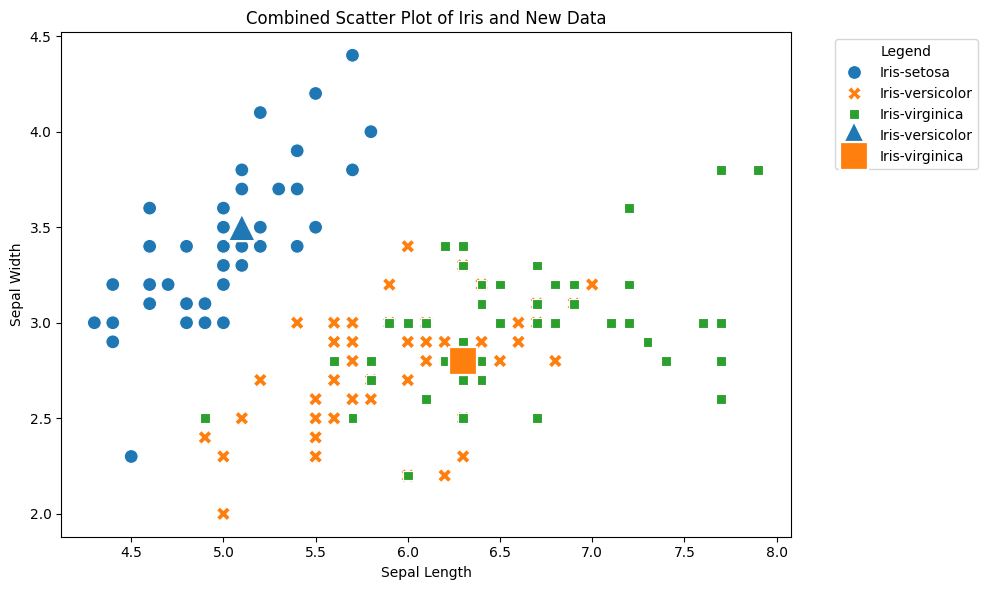

In [37]:
import seaborn as sns
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot Iris data
sns.scatterplot(data=Iris, x="SepalLength", y="SepalWidth", hue="Class", s=100, style="Class",  legend='full')

# Plot new_data with larger markers and different shapes
sns.scatterplot(data=new_data, x="SepalLength", y="SepalWidth", hue="Class", s=400, style="Class", markers=["^", "s", "o"], legend='full')

# Add a legend to differentiate between the two datasets
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")

# Add labels and title
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Combined Scatter Plot of Iris and New Data")

# Show the plot
plt.tight_layout()
plt.show()


# 3. Neural Network from Scratch

Consider a sample dataset with two features, three training samples $\mathbf{x} = [ x_1^{(1)}, x_2^{(1)} ], [ x_1^{(2)}, x_2^{(2)} ], [ x_1^{(3)}, x_2^{(3)} ] = [1, 4], [5, 6], [9, 12] $ and response variable $\mathbf{y} = y^{(1)}, y^{(2)}, y^{(3)} = [-1, 0, 1]$.

We want to build a neural networl containing two hidden layer: the first hidden layer will contain 4 hidden units or neurons, the second hidden layer will contain two hidden units or neurons. The prediction will be about predicting class value out of -1, 0, and 1. We will use cross entropy loss and optimization algorithm is stochastic gradient descent with learning rate of 0.05. The activation function to be used is sigmoid function.

The following code runs trains the neural network for two epochs.

In [71]:
import numpy as np

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Cross-Entropy loss and its derivative
def cross_entropy_loss(y_actual, y_pred):
    return -np.sum(np.multiply(y_actual, np.log(y_pred)) + np.multiply((1 - y_actual), np.log(1 - y_pred)))

def cross_entropy_loss_derivative(y_actual, y_pred):
    return -(np.divide(y_actual, y_pred) - np.divide(1 - y_actual, 1 - y_pred))

# Input samples
X = np.array([[1, 4], [5, 6], [9, 12]])

# Actual output
Y = np.array([[-1], [0], [1]])

# Weights and biases initialization
weights_hidden1 = np.array([[0.2, 0.3, 0.5, 0.9], [0.4, 0.7, 0.1, 0.8]])
biases_hidden1 = np.array([0.1, 0.2, 0.3, 0.4])
weights_hidden2 = np.array([[0.6, 0.9], [0.8, 0.2], [0.7, 0.1], [0.5, 0.3]])
biases_hidden2 = np.array([0.5, 0.6])
weights_output = np.array([[0.3], [0.6]])
biases_output = np.array([0.7])

# Learning rate
eta = 0.05


# Training for 2 iterations
for iii in range(2):
    # Forward Propagation
    print("\n============================================================")
    print("\n Iteration: {}\n".format(iii))
    print("\n____________________________________________________________\n")
    print("\n Forward Propagation")
    print("\n____________________________________________________________\n")

    hidden_layer1_output = sigmoid(np.dot(X, weights_hidden1) + biases_hidden1)
    print("Output from first hidden layer:\n", hidden_layer1_output)

    hidden_layer2_output = sigmoid(np.dot(hidden_layer1_output, weights_hidden2) + biases_hidden2)
    print("Output from second hidden layer:\n", hidden_layer2_output)

    predicted_output = sigmoid(np.dot(hidden_layer2_output, weights_output) + biases_output)
    print("Output from output layer:\n", predicted_output)

    print("\n____________________________________________________________\n")

    print("\n Backward Propagation")
    print("\n____________________________________________________________\n")

    # Backward Propagation
    error = cross_entropy_loss(Y, predicted_output)
    print("Error:\n", error)

    d_predicted_output = cross_entropy_loss_derivative(Y, predicted_output) * sigmoid_derivative(predicted_output)
    print("Derivative of the error with respect to Wo:\n", d_predicted_output)

    error_hidden_layer2 = d_predicted_output.dot(weights_output.T)
    d_hidden_layer2 = error_hidden_layer2 * sigmoid_derivative(hidden_layer2_output)
    print("Derivative of the error with respect to Wh2:\n", d_hidden_layer2)

    error_hidden_layer1 = d_hidden_layer2.dot(weights_hidden2.T)
    d_hidden_layer1 = error_hidden_layer1 * sigmoid_derivative(hidden_layer1_output)
    print("Derivative of the error with respect to Wh1:\n", d_hidden_layer1)

    # Updating Weights and Biases
    weights_output -= eta * hidden_layer2_output.T.dot(d_predicted_output)
    biases_output -= eta * np.sum(d_predicted_output)

    weights_hidden2 -= eta * hidden_layer1_output.T.dot(d_hidden_layer2)
    biases_hidden2 -= eta * np.sum(d_hidden_layer2)

    weights_hidden1 -= eta * X.T.dot(d_hidden_layer1)
    biases_hidden1 -= eta * np.sum(d_hidden_layer1)

    print("Updated weights and biases after backpropagation:")
    print("Wo:\n", weights_output)
    print("Bo:\n", biases_output)
    print("Wh2:\n", weights_hidden2)
    print("Bh2:\n", biases_hidden2)
    print("Wh1:\n", weights_hidden1)
    print("Bh1:\n", biases_hidden1)




 Iteration: 0


____________________________________________________________


 Forward Propagation

____________________________________________________________

Output from first hidden layer:
 [[0.86989153 0.96442881 0.76852478 0.98901306]
 [0.97068777 0.99726804 0.96770454 0.99993872]
 [0.9987706  0.99998763 0.99752738 0.99999999]]
Output from second hidden layer:
 [[0.94406221 0.87537515]
 [0.95510906 0.88793552]
 [0.9567904  0.89077129]]
Output from output layer:
 [[0.81883046]
 [0.8204345 ]
 [0.82075924]]

____________________________________________________________


 Backward Propagation

____________________________________________________________

Error:
 5.131506429624785
Derivative of the error with respect to Wo:
 [[ 1.81883046]
 [ 0.8204345 ]
 [-0.17924076]]
Derivative of the error with respect to Wh2:
 [[ 0.02881505  0.11905354]
 [ 0.01055302  0.04898291]
 [-0.00222308 -0.01046384]]
Derivative of the error with respect to Wh1:
 [[ 1.40838368e-02  1.60766787e-03  5.706